In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [4]:
customers_path = r"C:\Users\Aditi\Downloads\zeotap\Customers.csv"
products_path = r"C:\Users\Aditi\Downloads\zeotap\Products.csv"
transactions_path = r"C:\Users\Aditi\Downloads\zeotap\Transactions.csv"

In [5]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

In [6]:
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [7]:
sns.set_style("whitegrid")

In [8]:
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Check for duplicates
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


In [10]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [11]:
print("\nSummary Statistics:")
print(merged_data.describe())


Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


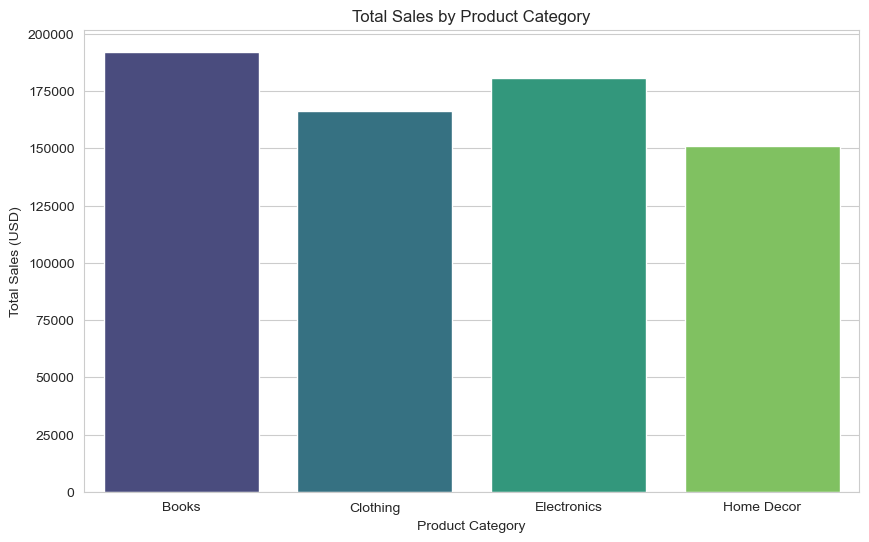

In [12]:
# 1. Sales distribution by product category
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_data.groupby("Category")["TotalValue"].sum().reset_index(),
    x="Category", y="TotalValue", palette="viridis"
)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (USD)")
plt.show()

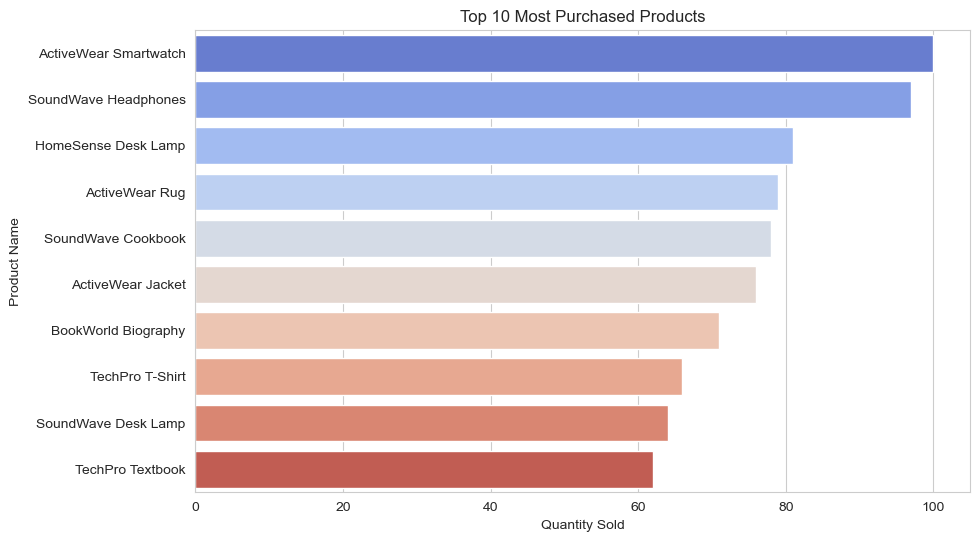

In [13]:
# 2. Most purchased products
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_data.groupby("ProductName")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(10),
    x="Quantity", y="ProductName", palette="coolwarm"
)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

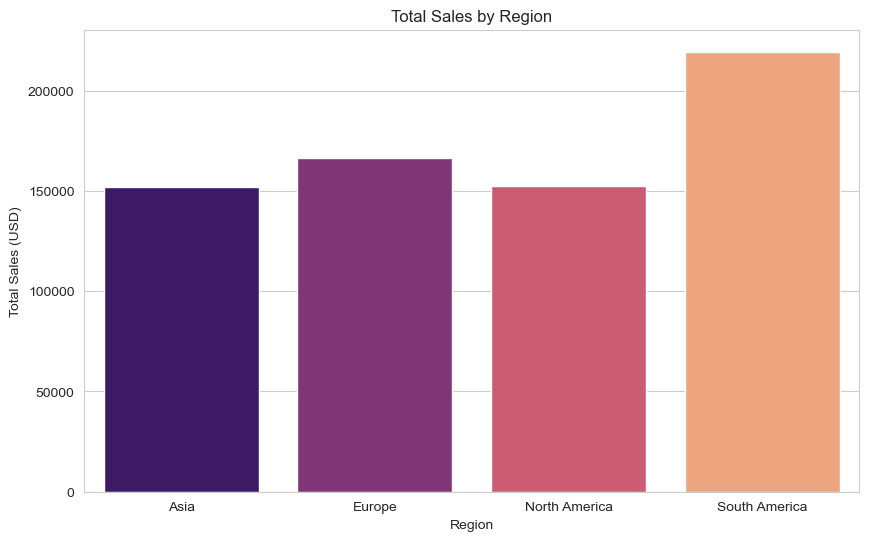

In [14]:
# 3. Customer regions and total sales
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_data.groupby("Region")["TotalValue"].sum().reset_index(),
    x="Region", y="TotalValue", palette="magma"
)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()

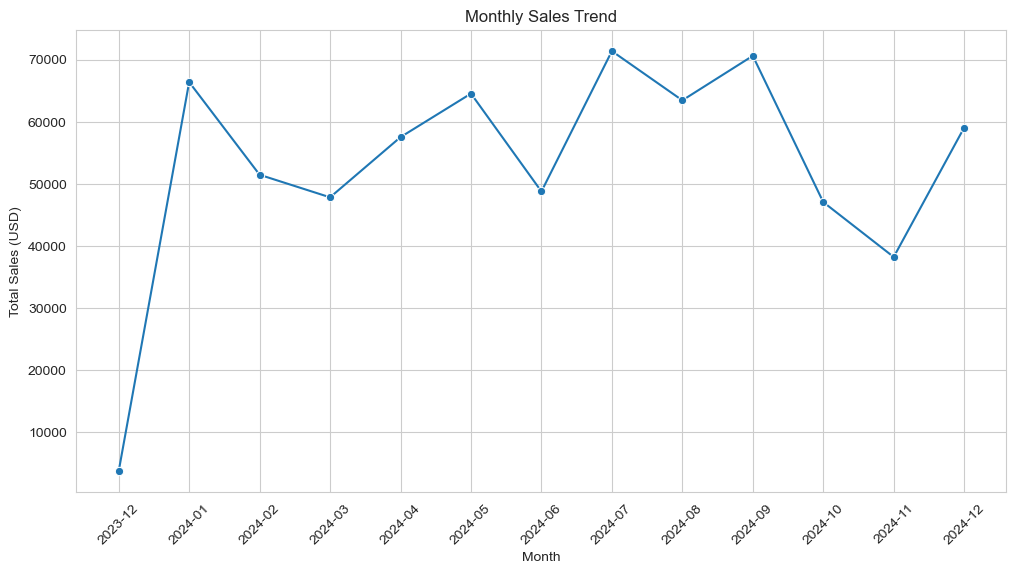

In [19]:
# 4. Trend in monthly sales
monthly_sales["Month"] = monthly_sales["Month"].astype(str)
monthly_sales["TotalValue"] = pd.to_numeric(monthly_sales["TotalValue"], errors="coerce")

monthly_sales = monthly_sales.dropna(subset=["TotalValue"])

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="TotalValue", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


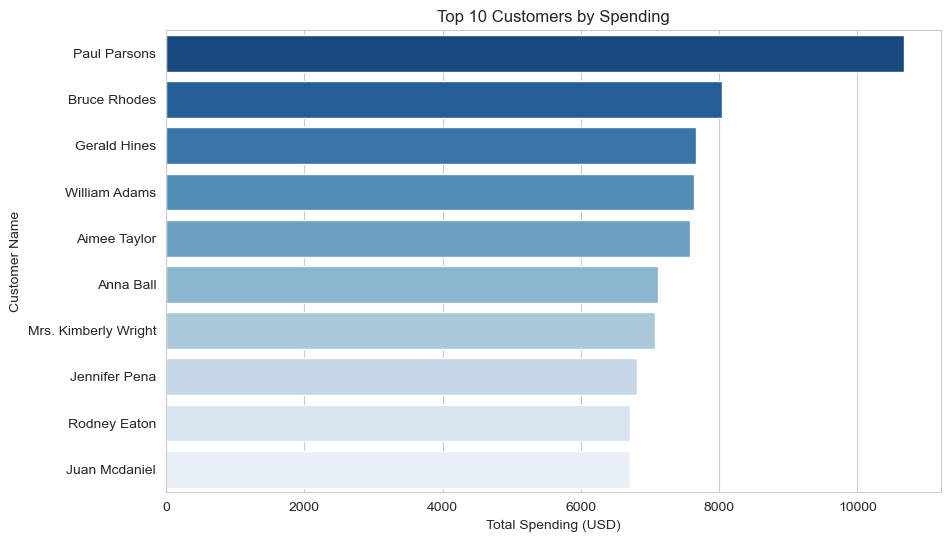

In [20]:
# 5. Top customers by spending
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().reset_index().sort_values(by="TotalValue", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x="TotalValue", y="CustomerName", palette="Blues_r")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()